<a href="https://colab.research.google.com/github/tarun4ml/abcnewsheadlines_clustering/blob/main/clustering_of_1M_news_headlines_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***importing necessary libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

***importing dataset***

In [ ]:
df=pd.read_csv('abcnews-date-text.csv')
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
# dimension of data
df.shape

(1186018, 2)

In [ ]:
# check if any duplicates in column
df= df.drop_duplicates('headline_text')

In [ ]:
df.shape

(1155838, 2)

In [ ]:
# reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
df['publish_date'].argsort(kind = 'mergesort')

0                0
1                1
2                2
3                3
4                4
            ...   
1155833    1155833
1155834    1155834
1155835    1155835
1155836    1155836
1155837    1155837
Name: publish_date, Length: 1155838, dtype: int64

In [ ]:
df.tail()

,publish_date,headline_text
1155833,20191231,vision of flames approaching corryong in victoria
1155834,20191231,wa police and government backflip on drug amne...
1155835,20191231,we have fears for their safety: victorian premier
1155836,20191231,when do the 20s start
1155837,20191231,yarraville shooting woman dead man critically ...


In [ ]:
df.isna().sum()

publish_date     0
headline_text    0
dtype: int64

In [ ]:
# no null values

**natural language processing**

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
import sklearn.feature_extraction.text as text
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

In [ ]:
# pre defined stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# converting columns to a list of values
head=df['headline_text'].values

Stemming is the process of reducing a word into its stem, i.e. its root form.

Tokenization is breaking the sentence into words and punctuation

In [ ]:
stop=set(stopwords.words('english'))
ss = SnowballStemmer("english")
reg = RegexpTokenizer(r'[a-zA-Z\']+')
def tokenize(text):
    return [ss.stem(word) for word in reg.tokenize(text.lower())]

TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

In [ ]:
vector=text.TfidfVectorizer(stop_words=stop, tokenizer =tokenize, max_features=1000)

In [ ]:
X=vector.fit_transform(head)

In [ ]:
wf=vector.get_feature_names()
len(wf)

1000

In [ ]:
wf[950:1000]

['vow',
 'vs',
 'wa',
 'wait',
 'walk',
 'wall',
 'wallabi',
 'want',
 'war',
 'warn',
 'warrior',
 'wast',
 'watch',
 'water',
 'way',
 'weather',
 'week',
 'welcom',
 'welfar',
 'well',
 'west',
 'western',
 'whale',
 'whi',
 'white',
 'wife',
 'wild',
 'william',
 'win',
 'wind',
 'wine',
 'winner',
 'wit',
 'without',
 'woe',
 'woman',
 'women',
 'wont',
 'work',
 'worker',
 'world',
 'worri',
 'would',
 'year',
 'yet',
 'yo',
 'young',
 'youth',
 'zealand',
 'zone']

In [ ]:
# importing kmeans cluster algorithm for text clustering
from sklearn.cluster import KMeans

[1119532.2614680002]
[1119532.2614680002, 1114155.8208100605]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045, 1101088.8671983795]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045, 1101088.8671983795, 1098065.394449554]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045, 1101088.8671983795, 1098065.394449554, 1095138.3827472797]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045, 1101088.8671983795, 1098065.394449554, 1095138.3827472797, 1094220.0559167943]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045, 1101088.8671983795, 1098065.394449554, 1095138.3827472797, 1094220.0559167943, 1092176.3433435773]
[1119532.2614680002, 1114155.8208100605, 1110182.8045903442, 1105336.4933605045, 1101088.867198

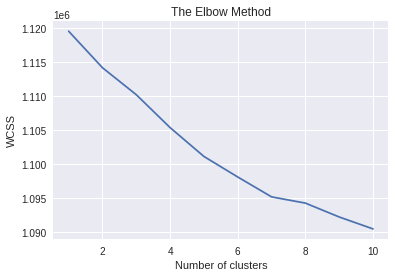

In [ ]:
# a loop of clusters ranging from 0 to 11
# also try to find best cluster by plotting elbow curve
wcss=[]
k=range(1,11)
for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(k,wcss)

As more than one elbows have been generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.

**5 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 5, n_init = 20) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(wf[word] for word in centroid))

0 : plan, call, win, council, us, fire, australia, back, govt, report, court, kill, warn, fund, urg, water, nsw, take, get, chang, interview, death, crash, sydney, open
1 : australian, open, dollar, share, year, south, market, win, us, new, say, first, kill, fall, china, team, help, day, die, png, soldier, name, arrest, world, chines
2 : say, charg, man, murder, face, assault, drug, child, death, sex, woman, court, teen, need, polic, us, stab, attack, drop, alleg, two, govt, former, minist, mp
3 : new, zealand, law, year, plan, open, get, name, council, polic, hospit, centr, australia, home, deal, set, hope, appoint, announc, look, say, chief, south, minist, govt
4 : polic, man, investig, arrest, jail, miss, murder, car, court, search, probe, death, attack, crash, offic, assault, die, kill, stab, shoot, hunt, accus, drug, charg, found


**6 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 6, n_init = 20) 
kmeans.fit(X)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(wf[word] for word in centroid))

0 : man, say, win, plan, charg, call, us, australia, court, back, govt, kill, report, australian, face, death, crash, warn, water, get, urg, nsw, take, fund, attack
1 : new, zealand, law, year, plan, open, get, name, polic, hospit, centr, australia, set, home, deal, hope, announc, look, appoint, say, south, minist, chief, wa, govt
2 : council, plan, consid, fund, rate, urg, seek, new, merger, water, land, back, develop, reject, say, mayor, elect, vote, chang, rise, call, get, citi, meet, park
3 : polic, investig, man, probe, offic, search, hunt, arrest, death, miss, charg, car, shoot, drug, attack, murder, assault, seek, crash, say, driver, suspect, raid, fatal, find
4 : fire, hous, crew, destroy, damag, polic, home, warn, burn, man, investig, threat, shot, nsw, caus, govt, spark, school, kill, resid, servic, ban, evacu, danger, sydney
5 : market, concern, close, share, us, rais, local, australian, fall, lead, gain, bank, air, higher, rise, mine, stock, price, wall, plan, trade, lower,

**7 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 7, n_init = 20) 
kmeans.fit(X)
# We look at 7 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(wf[word] for word in centroid))

0 : rise, rate, price, interest, toll, council, cut, pay, pc, death, high, fall, bank, star, cost, water, warn, low, say, us, hold, hous, crime, profit, wa
1 : polic, investig, probe, man, offic, search, hunt, arrest, miss, death, car, shoot, drug, seek, attack, say, murder, charg, assault, driver, crash, suspect, fatal, raid, find
2 : market, share, us, local, gain, fall, lead, australian, bank, higher, stock, close, wall, price, lower, trade, global, high, resourc, hous, loss, fund, despit, dollar, miner
3 : chang, climat, law, plan, call, council, say, rule, govt, urg, make, name, act, polici, propos, govern, could, tax, report, health, want, push, back, concern, australia
4 : man, charg, murder, face, court, jail, assault, stab, die, death, guilti, drug, child, woman, sex, attack, accus, arrest, crash, kill, car, found, alleg, miss, sydney
5 : win, award, cup, titl, open, gold, world, stage, first, final, tour, elect, australia, top, lead, seri, aussi, claim, second, back, australi

**8 clusters**

In [ ]:
kmeans = KMeans(n_clusters = 8, n_init = 20) 
kmeans.fit(X)
# We look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(wf[word] for word in centroid))

0 : plan, call, council, fire, australia, us, back, australian, report, court, warn, water, get, fund, take, nsw, death, chang, sydney, open, year, face, mine, hit, crash
1 : win, award, cup, titl, open, gold, world, stage, first, final, tour, elect, australia, lead, top, seri, aussi, claim, second, back, australian, grand, big, england, race
2 : new, zealand, law, year, plan, get, open, name, council, polic, centr, home, set, hospit, deal, australia, hope, appoint, announc, look, south, chief, minist, face, welcom
3 : say, polic, need, govt, us, minist, expert, plan, mp, union, council, trump, australia, report, could, govern, labor, wont, get, group, opposit, must, public, new, pm
4 : wa, elect, final, make, grand, feder, labor, cup, campaign, semi, us, countri, hour, vote, call, set, reach, open, liber, nation, govern, day, result, world, council
5 : govt, urg, fund, plan, council, nsw, qld, vic, water, public, consid, help, wa, act, local, sa, boost, accus, chang, back, reject, nt,

*choose wisely:)*